<a href="https://colab.research.google.com/github/rodriguezhh/IA_SIDIEN/blob/main/DIAGN%C3%93STICO_DE_ENFERMEDADES_EN_LA_HOJA_DEL_TOMATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIAGNÓSTICO DE ENFERMEDADES EN LA HOJA DEL TOMATE MEDIANTE UN SISTEMA EMBEBIDO USANDO INTELIGENCIA ARTIFICIAL E IMÁGENES.
## Trabajo De Grado

## **Acceder al drive**

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Importación de librerías**

In [ ]:
#librerias para el modelo
import tensorflow as tf
import keras
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np 

# librerias para el dataset
from keras.preprocessing.image import ImageDataGenerator

#librerias para las métricas 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## **Base De Datos**
La base de datos consta de tres enfermedades de la hoja de la planta del tomate y la hoja sana de la misma. La información, en este caso las imágenes, tiene una dimensión de 256 x 256 píxeles.

Guardamos la información previamente separada en la variables train, validation y test.

In [ ]:
# Definimos el tamaño de las imágenes y el tamaño del lote
image_size = 256 
batch_size = 32

# Creamos un generador de datos de imágenes para el entrenamiento con el objeto ImageDataGenerator
train_generator = ImageDataGenerator(
    zoom_range = 0.2, # Definimos el rango de zoom que se aplicará aleatoriamente a las imágenes
    horizontal_flip = True, # Definimos si se aplicará o no un volteo horizontal aleatorio a las imágenes
    vertical_flip = True, # Definimos si se aplicará o no un volteo vertical aleatorio a las imágenes
    rotation_range = 20, # Definimos el rango de rotación que se aplicará aleatoriamente a las imágenes
)

# Cargamos las imágenes de entrenamiento desde el directorio especificado y las transformamos utilizando el generador de datos
train = train_generator.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/TESIS/Dataset/80_20/train', # Ruta al directorio de entrenamiento
    target_size = (image_size, image_size), # Definimos el tamaño al que se redimensionarán todas las imágenes
    batch_size = batch_size, # Definimos el tamaño del lote
    shuffle = True, # Definimos si se barajarán aleatoriamente las imágenes en cada lote
    class_mode = 'categorical' # Definimos el modo de clasificación categórica
)

# Cargamos las imágenes de validación desde el directorio especificado y las transformamos utilizando el generador de datos
validation = train_generator.flow_from_directory( 
    '/content/drive/MyDrive/Colab Notebooks/TESIS/Dataset/80_20/val', # Ruta al directorio de validación
    target_size = (image_size, image_size), # Definimos el tamaño al que se redimensionarán todas las imágenes
    shuffle = False, # Definimos si se barajarán aleatoriamente las imágenes en cada lote
    batch_size = batch_size, # Definimos el tamaño del lote
    class_mode = 'categorical' # Definimos el modo de clasificación categórica
)

# Creamos otro generador de datos de imágenes para las imágenes de prueba
test_generator = ImageDataGenerator()

# Cargamos las imágenes de prueba desde el directorio especificado y las transformamos utilizando el generador de datos
test = test_generator.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/TESIS/Dataset/80_20/test', # Ruta al directorio de prueba
    target_size = (image_size, image_size), # Definimos el tamaño al que se redimensionarán todas las imágenes
    shuffle = False, # Definimos si se barajarán aleatoriamente las imágenes en cada lote
    batch_size = batch_size, # Definimos el tamaño del lote
    class_mode='categorical' # Definimos el modo de clasificación categórica
)


Found 3862 images belonging to 4 classes.
Found 481 images belonging to 4 classes.
Found 482 images belonging to 4 classes.


Las etiquetas de las imagenes son las siguietes:

In [ ]:
train.class_indices

{'Tomato_Late_blight': 0,
 'Tomato_Leaf_Mold': 1,
 'Tomato_healthy': 2,
 'Tomato_mosaic_virus': 3}

## **Modelo**

Model: "Modelo_BND"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 127, 127, 32)     128       
 hNormalization)                                                 
                                                        

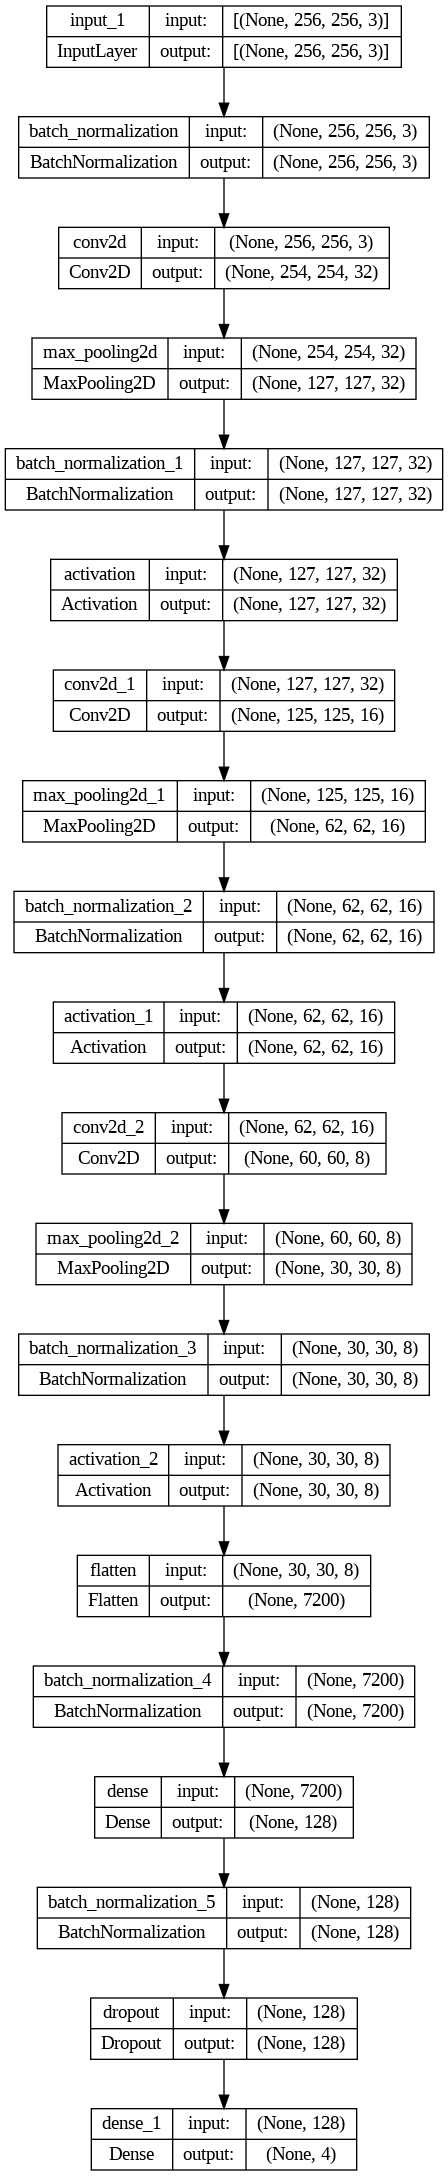

In [ ]:
# Definir la cantidad de canales de la imagen
rgb = 3

# Definir la estructura de entrada del modelo
input_shape = (image_size, image_size, rgb)
inputs = keras.Input(shape= (input_shape))

# Capa de normalización de la entrada
x = layers.BatchNormalization()(inputs)

# Capas convolucionales
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="valid", kernel_initializer='he_uniform')(x)
x = layers.MaxPooling2D(pool_size=(2,2), strides=None, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu", padding="valid", kernel_initializer='he_uniform')(x)
x = layers.MaxPooling2D(pool_size=(2,2), strides=None, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=8, kernel_size=(3,3), activation="relu", padding="valid", kernel_initializer='he_uniform')(x)
x = layers.MaxPooling2D(pool_size=(2,2), strides=None, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

# Capa de aplanamiento
x = layers.Flatten()(x)
x = layers.BatchNormalization()(x)

# Capa densa
x = layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)

# Capa de Dropout con 20% de probabilidad 
x = layers.Dropout(0.2)(x)

# Capa de salida con activación softmax
outputs = layers.Dense(4, activation="softmax", kernel_initializer='glorot_uniform')(x)

# Crear el modelo
model = keras.Model(inputs=inputs, outputs=outputs, name="modelo_tomate")

# Resumen del modelo
model.summary()

# Grafica la estructura del modelo
keras.utils.plot_model(model, "modelo_tomate.png", show_shapes=True)

## **Método Compile de Keras**
Definiendo el optimizador, la función de perdida y la métrica.

1.   Optimizadior: Adam. 
2.   Función de perdida: categorical_crossentropy. Porque previamente se definieron las etiquetas como "one-hot".
3.   Métrica: Accuracy. Se escoge la exactitud porque es la varible estandar de interes de un modelo. 



In [ ]:
model.compile(optimizer="adam",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

## **Callbacks**


1.   EarlyStopping: Nos permite detener el entrenamiento cuando la variable que se monitorea deja de mejorar. 
2.   ReduceLROnPlateau: Reduce el "learning rate" cuando la variable que se monitorea deja de mejorar. 



In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # La métrica que se va a monitorear para detener el entrenamiento
    patience=5,                    # El número de épocas que esperará antes de detener el entrenamiento
    verbose=1,                     # El nivel de detalle que se mostrará durante el entrenamiento
    restore_best_weights=True      # Si se deben restaurar los pesos del modelo a la mejor época durante el entrenamiento
)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',           # La métrica que se va a monitorear para reducir la tasa de aprendizaje
    factor=0.2,                   # Factor de reducción de la tasa de aprendizaje
    patience=2,                   # El número de épocas que esperará antes de reducir la tasa de aprendizaje
    verbose=1                     # El nivel de detalle que se mostrará durante el entrenamiento
)

## **Entrenamiento del modelo**

In [ ]:
history = model.fit(
    train,
    batch_size = batch_size,
    validation_data = validation, 
    epochs = 9000000,
    callbacks = [earlystopping, reduce_lr],
    )

Epoch 1/9000000
121/121 [==============================] - 2138s 18s/step - loss: 0.4582 - accuracy: 0.8382 - val_loss: 5.8774 - val_accuracy: 0.4200 - lr: 0.0010
Epoch 2/9000000
121/121 [==============================] - 74s 612ms/step - loss: 0.2412 - accuracy: 0.9171 - val_loss: 0.3530 - val_accuracy: 0.8607 - lr: 0.0010
Epoch 3/9000000
121/121 [==============================] - 73s 602ms/step - loss: 0.1898 - accuracy: 0.9360 - val_loss: 0.1486 - val_accuracy: 0.9543 - lr: 0.0010
Epoch 4/9000000
121/121 [==============================] - 75s 621ms/step - loss: 0.1332 - accuracy: 0.9565 - val_loss: 0.1740 - val_accuracy: 0.9397 - lr: 0.0010
Epoch 5/9000000
121/121 [==============================] - 73s 604ms/step - loss: 0.1463 - accuracy: 0.9492 - val_loss: 0.1113 - val_accuracy: 0.9647 - lr: 0.0010
Epoch 6/9000000
121/121 [==============================] - 76s 628ms/step - loss: 0.1221 - accuracy: 0.9596 - val_loss: 0.1208 - val_accuracy: 0.9522 - lr: 0.0010
Epoch 7/9000000
121/12

## **Evaluando el modelo**

In [ ]:
scores = model.evaluate(test)
print(scores)

16/16 [==============================] - 300s 20s/step - loss: 0.1336 - accuracy: 0.9523
[0.13357208669185638, 0.9522821307182312]


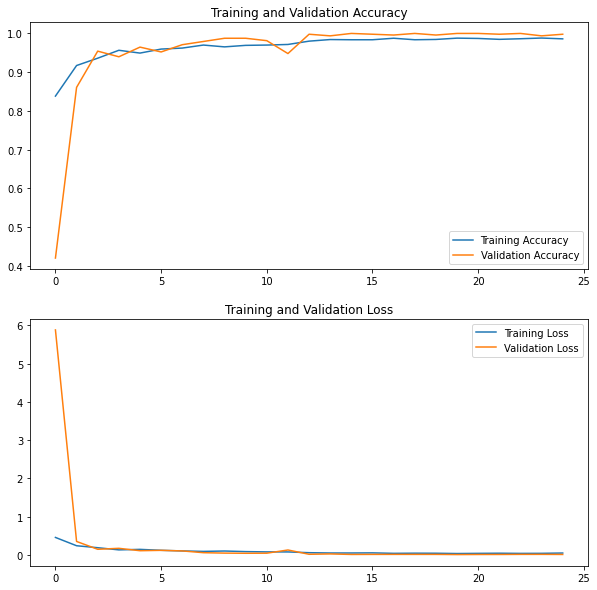

<Figure size 432x288 with 0 Axes>

In [ ]:
# Se crea una figura con dos subtramas
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

# Se plotea la precisión de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Se añade una leyenda y un título a la subtrama
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Se crea la segunda subtrama 
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Se añade una leyenda y un título a la subtrama
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Se muestran los gráficos
plt.show()

## **Matriz de confusión**

16/16 [==============================] - 3s 139ms/step


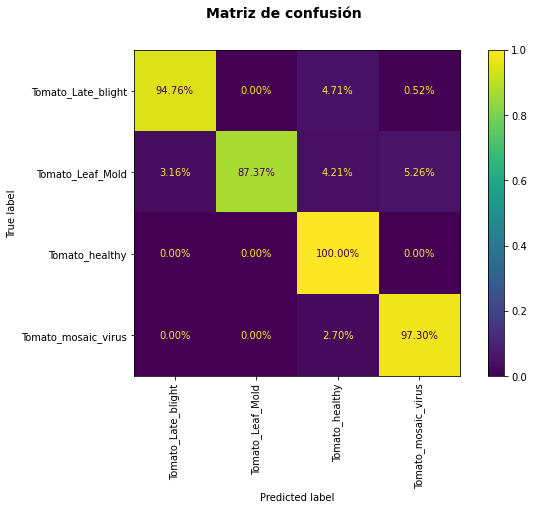

<Figure size 432x288 with 0 Axes>

In [ ]:
# Generar predicciones en el conjunto de prueba
predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las clases verdaderas y las etiquetas de las clases
true_classes = test.classes
class_labels = list(test.class_indices.keys())    

# Calcular la matriz de confusión normalizada
cm = confusion_matrix(
    y_true=true_classes,
    y_pred=predicted_classes,
    normalize='true')

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10, 6))
disp.plot(include_values=True, cmap="viridis", ax=ax, xticks_rotation="vertical", values_format=".2%")

# Configurar el título del gráfico
fig.suptitle("Matriz de confusión", fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

## **Métricas**

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

                     precision    recall  f1-score   support

 Tomato_Late_blight       0.98      0.95      0.97       191
   Tomato_Leaf_Mold       1.00      0.87      0.93        95
     Tomato_healthy       0.92      1.00      0.96       159
Tomato_mosaic_virus       0.86      0.97      0.91        37

           accuracy                           0.95       482
          macro avg       0.94      0.95      0.94       482
       weighted avg       0.96      0.95      0.95       482



## **Guardando el modelo**

In [ ]:
model.save('TOLD2.h5')